![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [2]:
import tensorflow
tensorflow.__version__

'2.4.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

#### Change current working directory to project folder (2 marks)

In [4]:
#### Add your code here ####
import os
os.chdir('/content/drive/MyDrive/AIML/AI/Computer Vision/Project2/')

In [5]:
project_path = "/content/drive/MyDrive/AIML/AI/Computer Vision/Project2/"

### Extract the zip file (3 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [6]:
# #### Add your code here ####

# from zipfile import ZipFile

# with ZipFile(project_path+'Aligned Face Dataset from Pinterest.zip', 'r') as z:
#   z.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [7]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [8]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (3 marks)
- Load one image using the function "load_image"

[[[233 188 165]
  [231 186 163]
  [220 178 156]
  ...
  [106  63  72]
  [106  63  72]
  [106  63  72]]

 [[232 187 164]
  [233 188 165]
  [220 178 156]
  ...
  [106  63  72]
  [106  63  72]
  [106  63  72]]

 [[230 186 161]
  [228 184 159]
  [206 164 140]
  ...
  [106  63  72]
  [106  63  72]
  [106  63  72]]

 ...

 [[198 118  91]
  [197 120  94]
  [195 119  95]
  ...
  [ 78  66  76]
  [ 78  66  76]
  [ 78  66  76]]

 [[200 120  93]
  [200 120  93]
  [198 121  95]
  ...
  [ 78  66  76]
  [ 78  66  76]
  [ 78  66  76]]

 [[201 121  94]
  [201 121  94]
  [199 122  96]
  ...
  [ 78  66  76]
  [ 78  66  76]
  [ 78  66  76]]]


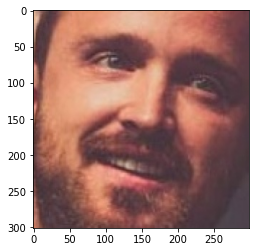

In [9]:
from matplotlib import pyplot as plt
print(load_image('/content/drive/MyDrive/AIML/AI/Computer Vision/Project2/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg'))
#### Add your code here ####
plt.imshow(load_image('/content/drive/MyDrive/AIML/AI/Computer Vision/Project2/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg'))

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (3 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [11]:
#### Add your code here ####
model = vgg_face()
model.summary()

#### Add your code here ####
model.load_weights('./vgg_face_weights.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [12]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [13]:
model.layers[0].input, model.layers[-2].output

(<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>,
 <KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [14]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (8 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [15]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
  #### Add your code here ####
  img = load_image(m.image_path())
  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  try:
    # Obtain embedding vector for an image
    # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  except:
    embeddings[i]=np.zeros(2622*1)

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [32]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

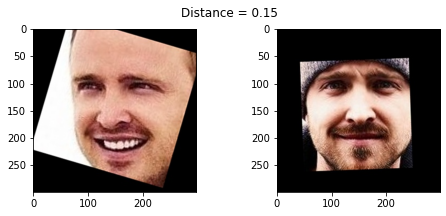

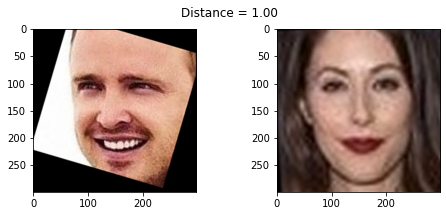

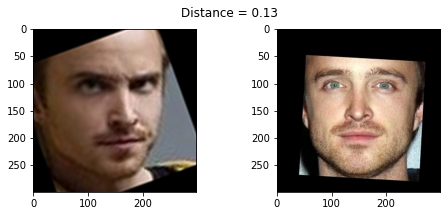

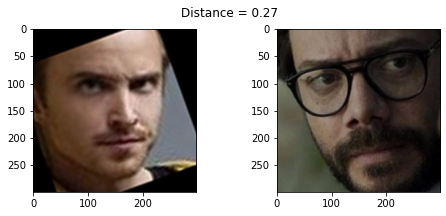

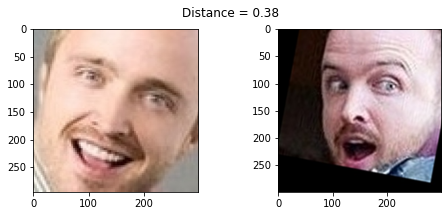

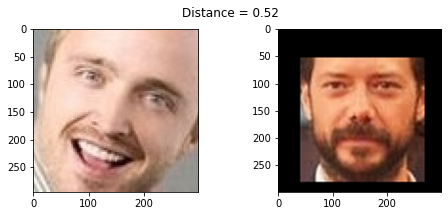

In [33]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

show_pair(30, 31)
show_pair(30, 100)

show_pair(70, 72)
show_pair(70, 115)

Example shows that the squared L2 distance between its anchor-positive pair is smaller than the distance between its anchor-negative pair.

Face recognition is now as simple as calculating the distances between an input embedding vector and all embedding vectors in a database. We can put some threshold where an input image is correctly recognised with smallest distance if it is less than specified threshold or label unknown otherwise.

### Create train and test sets (8 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [51]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

#### Add your code here ####
from sklearn.preprocessing import LabelEncoder

targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
y = encoder.fit_transform(targets)

#train labels
y_train = y[train_idx]
#test labels
y_test = y[test_idx]
#### Add your code here ####

In [52]:
X_train ,X_test, X_train.shape ,X_test.shape

(array([[ 0.03313464, -0.00543039,  0.00063961, ...,  0.00166556,
         -0.00302967, -0.00016391],
        [ 0.04397821, -0.00302586,  0.00051129, ..., -0.00943851,
         -0.00273483,  0.01239773],
        [ 0.04269913, -0.01109609, -0.00905471, ..., -0.00952896,
         -0.00257516,  0.00590354],
        ...,
        [ 0.00965871,  0.00372159, -0.01345864, ..., -0.01433404,
          0.01899943,  0.03899154],
        [ 0.00230931,  0.00094764, -0.00544815, ..., -0.01600495,
          0.01053974,  0.03683253],
        [ 0.01772299,  0.01064049,  0.01995195, ..., -0.02618429,
          0.03288926,  0.04882648]]),
 array([[ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
          0.00219081, -0.00908097],
        [ 0.02626053,  0.00147696, -0.00927285, ..., -0.00515147,
          0.00603828,  0.01470516],
        [ 0.02198225, -0.02106836, -0.00232111, ..., -0.0039725 ,
          0.00130397,  0.01268389],
        ...,
        [ 0.00842342,  0.01685073,  0.00380331, ..., -

In [53]:
y_train, y_test, y_train.shape, y_test.shape

(array([ 0,  0,  0, ..., 99, 99, 99]),
 array([ 0,  0,  0, ..., 99, 99, 99]),
 (9573,),
 (1197,))

### Encode the Labels (4 marks)
- Encode the targets
- Use LabelEncoder

In [54]:
# from sklearn.preprocessing import LabelEncoder
# #### Add your code here ####

# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.fit_transform(y_test)

In [55]:
y_train, y_test

(array([ 0,  0,  0, ..., 99, 99, 99]), array([ 0,  0,  0, ..., 99, 99, 99]))

### Standardize the feature values (4 marks)
- Scale the features using StandardScaler

In [56]:
# Standarize features
from sklearn.preprocessing import StandardScaler
#### Add your code here ####

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [57]:
X_train, X_test

(array([[ 2.32814581, -0.43208532, -0.20938141, ...,  1.51650957,
         -0.84612566, -1.04731635],
        [ 3.45931393, -0.22810198, -0.22155993, ...,  0.47225661,
         -0.81832764, -0.08524627],
        [ 3.32588405, -0.91272275, -1.12943193, ...,  0.46375126,
         -0.80327305, -0.58262304],
        ...,
        [-0.12079021,  0.34430355, -1.5473912 , ...,  0.01186965,
          1.23080102,  1.95151963],
        [-0.88745632,  0.10898146, -0.78714718, ..., -0.14526651,
          0.43321308,  1.78616515],
        [ 0.72045079,  0.9312537 ,  1.623477  , ..., -1.10255531,
          2.5403484 ,  2.70475707]]),
 array([[ 2.21227434, -1.27307713, -1.52972646, ...,  1.3972422 ,
         -0.34203887, -1.76772635],
        [ 1.63217638,  0.12654666, -1.22046323, ...,  0.87256624,
          0.0158069 ,  0.09837847],
        [ 1.17617159, -1.78260586, -0.54036174, ...,  0.9833654 ,
         -0.42452184, -0.06019728],
        ...,
        [-0.26901024,  1.42840819,  0.05880177, ..., -

### Reduce dimensions using PCA (4 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [58]:
from sklearn.decomposition import PCA
#### Add your code here ####

pca_128 = PCA(n_components=128)
X_train=pca_128.fit_transform(X_train)
X_test=pca_128.fit_transform(X_test)

In [59]:
X_train.shape, X_test.shape

((9573, 128), (1197, 128))

### Build a Classifier (4 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [60]:
from sklearn.svm import SVC
#### Add your code here ####
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
from sklearn.metrics import accuracy_score
svm_model.score(X_train, y_train), accuracy_score(svm_model.predict(X_test), y_test)

(0.9957171210696751, 0.059314954051796154)

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

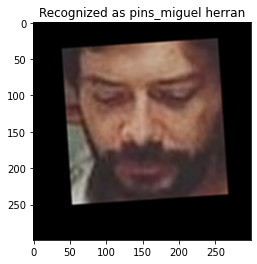

In [62]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

test = [embeddings[test_idx][example_idx]]
test = pca_128.transform(test)

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svm_model.predict(test)
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Recognized as {example_identity}');

In [64]:
metadata[test_idx][example_idx]

PINS/pins_Alvaro Morte/Alvaro Morte124_800.jpg

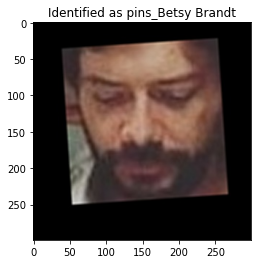

In [63]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svm_model.predict(X_test)[example_idx]#### Add your code here ####
example_identity = encoder.inverse_transform(y_test)[example_prediction]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');